In [4]:
import torch
import spacy
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [5]:
import GPUtil
r = GPUtil.getAvailable()
print(r)

import torch
use_cuda = torch.cuda.is_available()
print(use_cuda)


if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

[0]
True
__CUDNN VERSION: 90100
__Number CUDA Devices: 1
__CUDA Device Name: Quadro RTX 4000
__CUDA Device Total Memory [GB]: 8.589606912


In [6]:
%%time
nlp = spacy.load("./output/model-best") #load the best model.

C:\Users\shweta_s\.conda\envs\gpuenv\Lib\site-packages\spacy_transformers\layers\hf_shim.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self._model.load_state_dict(to

CPU times: total: 15.5 s
Wall time: 9.28 s


In [8]:
%%time
from spacy.tokens import DocBin
from spacy.training import Example
from spacy.scorer import Scorer

doc_bin = DocBin().from_disk("validation.spacy") 
docs = list(doc_bin.get_docs(nlp.vocab))

CPU times: total: 3.64 s
Wall time: 3.64 s


In [9]:
%%time
scorer = Scorer()
examples = []

for gold_doc in docs:
    pred_doc = nlp(gold_doc.text)
    examples.append(Example(pred_doc, gold_doc))

scores = scorer.score(examples)
print(scores)

{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'sents_p': None, 'sents_r': None, 'sents_f': None, 'tag_acc': None, 'pos_acc': None, 'morph_acc': None, 'morph_micro_p': None, 'morph_micro_r': None, 'morph_micro_f': None, 'morph_per_feat': None, 'dep_uas': None, 'dep_las': None, 'dep_las_per_type': None, 'ents_p': 0.8889910593028519, 'ents_r': 0.9244586324585148, 'ents_f': 0.9063780072693706, 'ents_per_type': {'DISTRICT': {'p': 0.7943184099578398, 'r': 0.9603155339805826, 'f': 0.8694648939676959}, 'STATE': {'p': 0.9240353908172347, 'r': 0.9451643997001178, 'f': 0.9344804765056254}, 'SUBDISTRICT': {'p': 0.8460627122660137, 'r': 0.8276288341188287, 'f': 0.8367442587095766}, 'TOWN': {'p': 0.9816335122618671, 'r': 0.9383268776095377, 'f': 0.9594917826187598}}, 'cats_score': 0.0, 'cats_score_desc': 'macro F', 'cats_micro_p': 0.0, 'cats_micro_r': 0.0, 'cats_micro_f': 0.0, 'cats_macro_p': 0.0, 'cats_macro_r': 0.0, 'cats_macro_f': 0.0, 'cats_macro_auc': 0.0, 'cats_f_per_type'

In [10]:
# Extract relevant metrics
precision = scores["ents_p"]
recall = scores["ents_r"]
f1 = scores["ents_f"]
accuracy = scores["token_acc"] # Token accuracy. This is a good general accuracy metric.

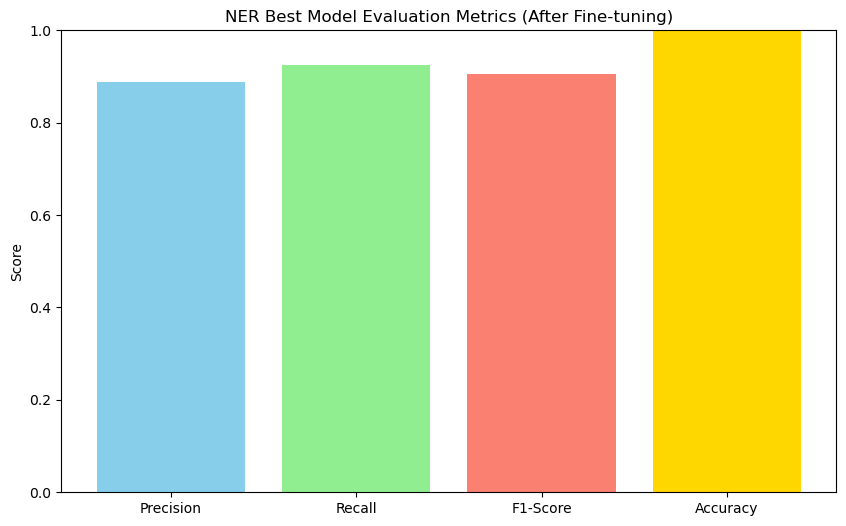

[0.8889910593028519, 0.9244586324585148, 0.9063780072693706, 1.0]


In [18]:
# Visualization
import matplotlib.pyplot as plt
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=["skyblue", "lightgreen", "salmon", "gold"])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for percentage-based metrics
plt.title("NER Best Model Evaluation Metrics (After Fine-tuning)")
plt.ylabel("Score")
plt.show()
print(values)

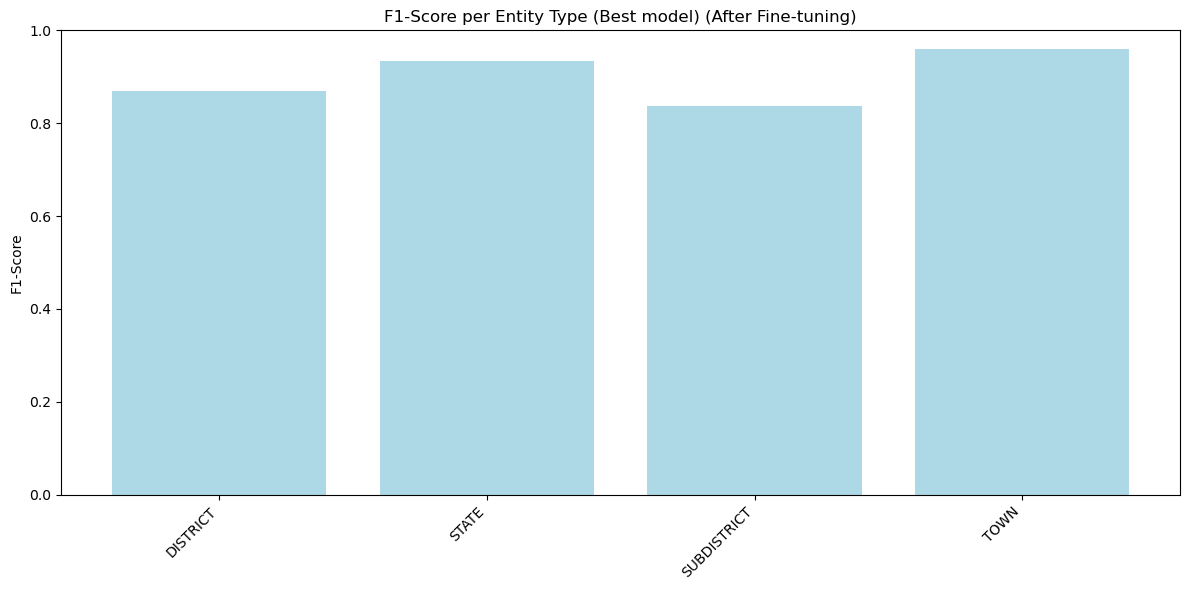

In [19]:
# Visualize per-entity type F1-scores
if "ents_per_type" in scores and scores["ents_per_type"]:
    entity_types = list(scores["ents_per_type"].keys())
    f1_per_type = [scores["ents_per_type"][entity]["f"] for entity in entity_types]

    plt.figure(figsize=(12, 6))
    plt.bar(entity_types, f1_per_type, color="lightblue")
    plt.ylim(0, 1)
    plt.title("F1-Score per Entity Type (Best model) (After Fine-tuning)")
    plt.ylabel("F1-Score")
    plt.xticks(rotation=45, ha="right") #rotate labels so they are readable
    plt.tight_layout() #prevents labels from being cut off
    plt.show()

In [15]:
print(entity_types)
print(f1_per_type)

['DISTRICT', 'STATE', 'SUBDISTRICT', 'TOWN']
[0.8694648939676959, 0.9344804765056254, 0.8367442587095766, 0.9594917826187598]


In [26]:
%%time
nlp = spacy.load("./output/model-last") #load the last model.

CPU times: total: 9.5 s
Wall time: 3.2 s


In [27]:
%%time
from spacy.tokens import DocBin
from spacy.training import Example
from spacy.scorer import Scorer

doc_bin = DocBin().from_disk("validation.spacy") 
docs = list(doc_bin.get_docs(nlp.vocab))

CPU times: total: 5.31 s
Wall time: 4.33 s


In [28]:
%%time
scorer = Scorer()
examples = []

for gold_doc in docs:
    pred_doc = nlp(gold_doc.text)
    examples.append(Example(pred_doc, gold_doc))

scores = scorer.score(examples)
print(scores)

{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'sents_p': None, 'sents_r': None, 'sents_f': None, 'tag_acc': None, 'pos_acc': None, 'morph_acc': None, 'morph_micro_p': None, 'morph_micro_r': None, 'morph_micro_f': None, 'morph_per_feat': None, 'dep_uas': None, 'dep_las': None, 'dep_las_per_type': None, 'ents_p': 0.9088934511589157, 'ents_r': 0.8987583853124632, 'ents_f': 0.9037975058064708, 'ents_per_type': {'DISTRICT': {'p': 0.8005541587562215, 'r': 0.9467233009708738, 'f': 0.8675248130334454}, 'STATE': {'p': 0.9952346041055719, 'r': 0.8723358680518368, 'f': 0.9297414531134068}, 'SUBDISTRICT': {'p': 0.8515957874427205, 'r': 0.8184346751139612, 'f': 0.834685997951304}, 'TOWN': {'p': 0.9834584082020928, 'r': 0.936113486593893, 'f': 0.9592020824205562}}, 'cats_score': 0.0, 'cats_score_desc': 'macro F', 'cats_micro_p': 0.0, 'cats_micro_r': 0.0, 'cats_micro_f': 0.0, 'cats_macro_p': 0.0, 'cats_macro_r': 0.0, 'cats_macro_f': 0.0, 'cats_macro_auc': 0.0, 'cats_f_per_type': 

In [29]:
# Extract relevant metrics
precision = scores["ents_p"]
recall = scores["ents_r"]
f1 = scores["ents_f"]
accuracy = scores["token_acc"] # Token accuracy. This is a good general accuracy metric.

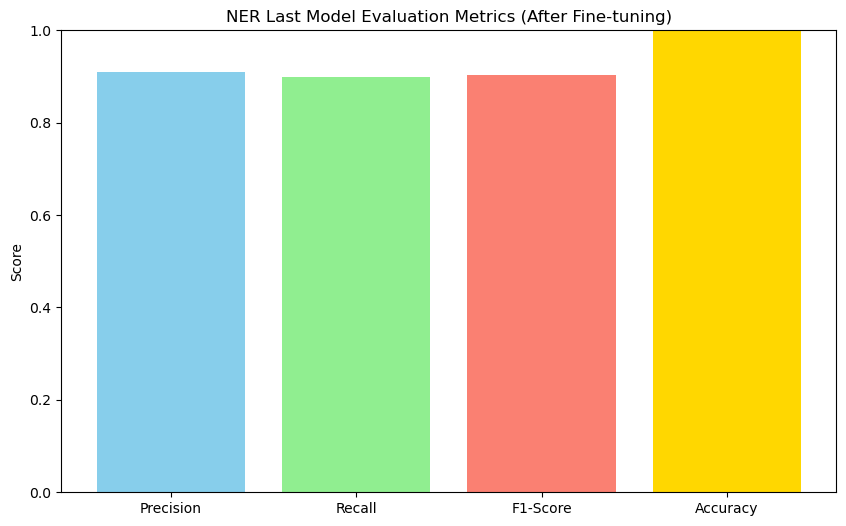

[0.9088934511589157, 0.8987583853124632, 0.9037975058064708, 1.0]


In [30]:
# Visualization
import matplotlib.pyplot as plt
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=["skyblue", "lightgreen", "salmon", "gold"])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for percentage-based metrics
plt.title("NER Last Model Evaluation Metrics (After Fine-tuning)")
plt.ylabel("Score")
plt.show()
print(values)

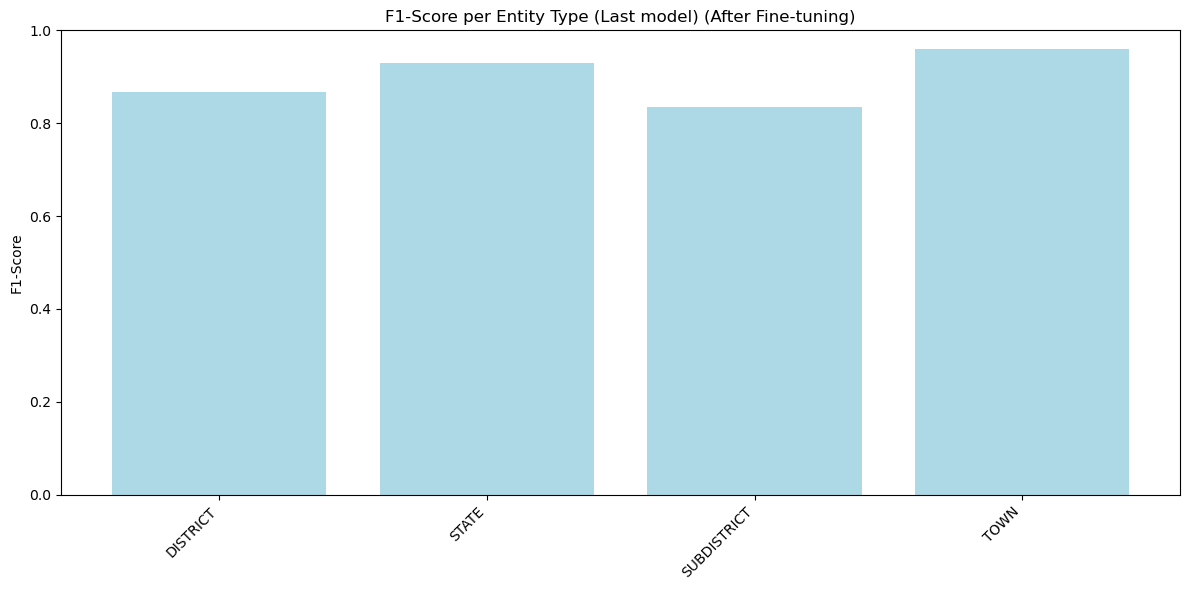

In [31]:
# Visualize per-entity type F1-scores
if "ents_per_type" in scores and scores["ents_per_type"]:
    entity_types = list(scores["ents_per_type"].keys())
    f1_per_type = [scores["ents_per_type"][entity]["f"] for entity in entity_types]

    plt.figure(figsize=(12, 6))
    plt.bar(entity_types, f1_per_type, color="lightblue")
    plt.ylim(0, 1)
    plt.title("F1-Score per Entity Type (Last model) (After Fine-tuning)")
    plt.ylabel("F1-Score")
    plt.xticks(rotation=45, ha="right") #rotate labels so they are readable
    plt.tight_layout() #prevents labels from being cut off
    plt.show()

In [32]:
print(entity_types)
print(f1_per_type)

['DISTRICT', 'STATE', 'SUBDISTRICT', 'TOWN']
[0.8675248130334454, 0.9297414531134068, 0.834685997951304, 0.9592020824205562]
